In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nf = 3.48
ns = 1.45
nc = 1.00
a  = 1.0e-6
lmbd = 3e-6
c0 = 299792458
pi = np.pi
arredondamento = 4

# Modo TE

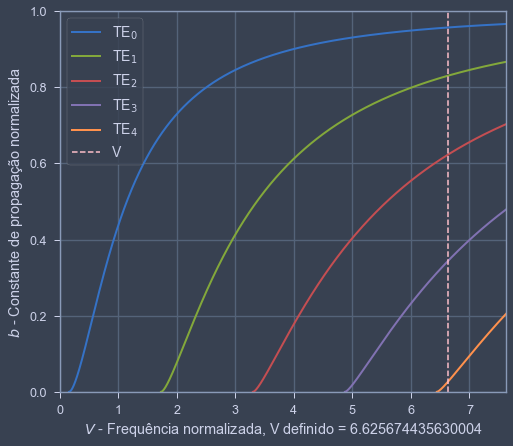

In [4]:
k0 = 2*np.pi/lmbd 
Vescolhido = k0*a*np.sqrt(nf**2 - ns**2)
sigma = (ns**2 - nc**2)/(nf**2 - ns**2)
omega = k0*c0
b  = np.linspace(1e-10, .99, 1000)
nm =int(1 +np.floor((2*Vescolhido - np.arctan(np.sqrt(sigma)))/np.pi))
Vm = []

for m in range(nm):
  V = 1/(2*np.sqrt(1-b))*(m*np.pi + np.arctan(np.sqrt((b+sigma)/(1-b))) + np.arctan(np.sqrt((b)/(1-b))))
  Vm.append(V)
  plt.plot(V, b, linewidth = 2, label = 'TE$_{%d}$' %(m))

plt.axvline(Vescolhido,label = "V",color="pink",ls='--')
plt.xlim([0,Vescolhido + 1])
plt.ylim([0,1])
plt.xlabel('$V$ - Frequência normalizada, V definido = {0}'.format(Vescolhido))
plt.ylabel(r'$b$ - Constante de propagação normalizada')
plt.grid(True)
plt.legend(fontsize = 14);

In [6]:

tol = 1e-10
r = 0.5
R = k0*a*np.sqrt(nf**2-ns**2) # V
u = np.zeros(nm)
u1 = np.zeros(nm)
v = np.zeros(nm)
w = np.zeros(nm)
bnormalizado = np.zeros(nm)
for m in range(nm):
    u[m] = 20
    u1[m] = R
    v[m] = 0
    w[m] = R*np.sqrt(sigma)
    while(np.absolute(u1[m]-u[m])>tol):
        treco = treco + 1
        u[m] = u1[m]
        F = m*pi/2 + np.arctan(v[m]/u[m])/2 + np.arctan(w[m]/u[m])/2
        u1[m] = r*F + (1-r)*u[m]
        v[m] = np.sqrt(R**2 - u1[m]**2)
        w[m] = np.sqrt((R**2)*sigma + v[m]**2)
    bnormalizado[m] = (v[m]/R)**2
    print("Para TE{0}: u = {1}, v = {2}, w = {3}, beta normalizado = {4}".format(m,round(u[m],arredondamento),round(v[m],arredondamento),round(w[m],arredondamento),round(bnormalizado[m],arredondamento)))





Para TE0: u = 1.3682, v = 6.4829, w = 6.8457, beta normalizado = 0.9574
Para TE1: u = 2.7286, v = 6.0377, w = 6.4258, beta normalizado = 0.8304
Para TE2: u = 4.0704, v = 5.228, w = 5.6717, beta normalizado = 0.6226
Para TE3: u = 5.3715, v = 3.879, w = 4.459, beta normalizado = 0.3427
Para TE4: u = 6.5414, v = 1.0533, w = 2.4384, beta normalizado = 0.0253


In [7]:
phi = np.zeros(nm)
beta = np.zeros(nm)
kf = np.zeros(nm)
alphas = np.zeros(nm) 
alphac = np.zeros(nm)
for m in range(nm):
    phi[m] = m*pi/2 + np.arctan(w[m]/u[m])/2 - np.arctan(v[m]/u[m])/2
    beta[m] = np.sqrt(bnormalizado[m]*(k0**2)*(nf**2 - ns**2) + (k0*ns)**2)
    kf[m] = np.sqrt(k0**2 * nf**2 - beta[m]**2)
    alphas[m] = np.sqrt(beta[m]**2 - k0**2 * ns**2)
    alphac[m] = np.sqrt(beta[m]**2 - k0**2 * nc**2)
    print("Para TE{0}: β = {1}, Φ = {2}, kf = {3}, αs = {4}, αc = {5}".format(m,round(beta[m],arredondamento),round(phi[m],arredondamento),round(kf[m],arredondamento),round(alphas[m],arredondamento),round(alphac[m],arredondamento)))

Para TE0: β = 7158929.1862, Φ = 0.0054, kf = 1368170.9086, αs = 6482875.1408, αc = 6845712.2528
Para TE1: β = 6758473.7837, Φ = 1.5822, kf = 2728587.7012, αs = 6037745.5133, αc = 6425766.65
Para TE2: β = 6046007.3361, Φ = 3.1611, kf = 4070375.1694, αs = 5227964.0117, αc = 5671658.8282
Para TE3: β = 4926350.4533, Φ = 4.7461, kf = 5371520.2634, αs = 3878960.1425, αc = 4458972.7453
Para TE4: β = 3214354.6122, Φ = 6.3818, kf = 6541412.9326, αs = 1053317.8873, αc = 2438356.9731


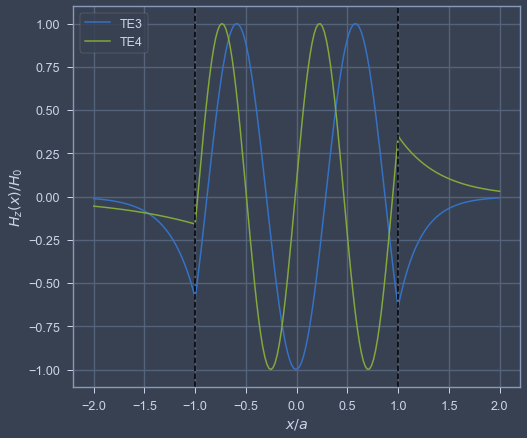

In [8]:
#plot Hz
H1 = 1
xs = np.linspace(-2*a,-a,num = 100)
xf = np.linspace(-a,a,num = 100)
xc = np.linspace(a,2*a,num = 100)
cores = ['b','g','r','c','m','y','w']
Hzf = np.zeros(nm)
Hzc = np.zeros(nm)
Hzs = np.zeros(nm)

for m in range(nm):
    Hzf = H1*np.sin(kf[m]*xf + phi[m])
    Hzc = H1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))
    Hzs = -H1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))
    if m > 2:
        plt.plot(np.concatenate([xs,xf,xc])/a,np.concatenate([Hzs,Hzf,Hzc]),label = 'TE{0}'.format(m))
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_z(x)/H_0}$');





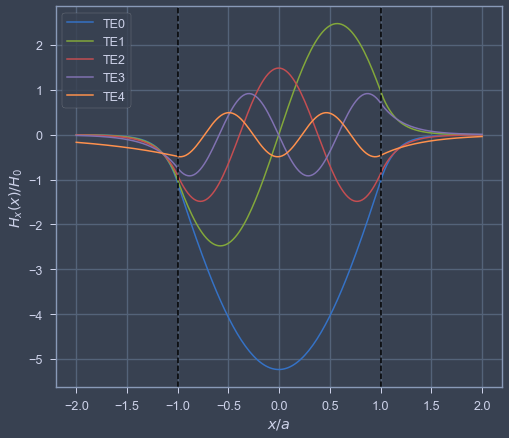

In [10]:
#Plot Hx

H1 = 1
xs = np.linspace(-2*a,-a,num = 100)
xf = np.linspace(-a,a,num = 100)
xc = np.linspace(a,2*a,num = 100)
cores = ['b','g','r','c','m','y','w']

Hxf = np.zeros(nm)
Hxc = np.zeros(nm)
Hxs = np.zeros(nm)

for m in range(nm):
    Hxf = -beta[m]*H1*np.cos(kf[m]*xf + phi[m])/kf[m] #*j
    Hxc =-beta[m]*H1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))/alphac[m] #*j
    Hxs = -beta[m]*H1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))/alphas[m] #*j
    if m < 10:
        plt.plot(np.concatenate([xs,xf,xc])/a,np.concatenate([Hxs,Hxf,Hxc]),label = 'TE{0}'.format(m))
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_x(x)/H_0}$');


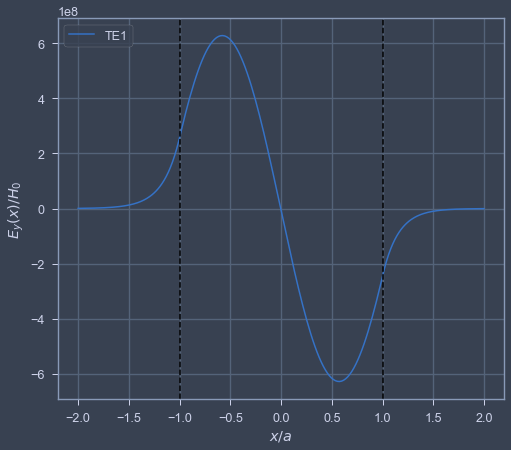

In [11]:
#plot Ey (valores muito altos????)

H1 = 1
xs = np.linspace(-2*a,-a,num = 100)
xf = np.linspace(-a,a,num = 100)
xc = np.linspace(a,2*a,num = 100)
cores = ['b','g','r','c','m','y','w']

Eyf = np.zeros(nm)
Eyc = np.zeros(nm)
Eys = np.zeros(nm)

for m in range(nm):
    Eyf = omega*u[m]*H1*np.cos(kf[m]*xf + phi[m])/kf[m] #*j
    Eyc =omega*u[m]*H1*np.sin(kf[m]*a + phi[m])*np.exp(-alphac[m]*(xc-a))/alphac[m] #*j
    Eys = omega*u[m]*H1*np.sin(kf[m]*a - phi[m])*np.exp(alphas[m]*(xs+a))/alphas[m] #*j
    if m == 1:
        plt.plot(np.concatenate([xs,xf,xc])/a,np.concatenate([Eys,Eyf,Eyc]),label = 'TE{0}'.format(m))
plt.axvline(1,color='black',ls='--')
plt.axvline(-1,color='black',ls='--')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_y(x)/H_0}$');


Para TE0: Fator de acoplamento = 0.9947
Para TE1: Fator de acoplamento = 0.9777
Para TE2: Fator de acoplamento = 0.9442
Para TE3: Fator de acoplamento = 0.8782
Para TE4: Fator de acoplamento = 0.6174


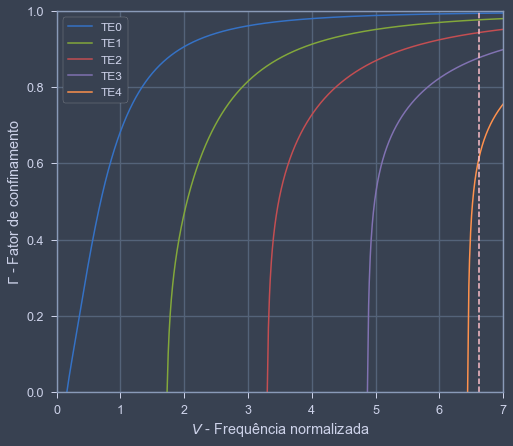

In [12]:
Facoplamento = np.zeros(nm)
for m in range(nm):
    Facoplamento[m] = (1 + ((np.sin(u[m]-phi[m])**2)/(2*v[m])) + ((np.sin(u[m]+phi[m])**2)/(2*w[m])))/(1 + 1/(2*v[m]) + 1/(2*w[m]))
    print("Para TE{0}: Fator de acoplamento = {1}".format(m,round(Facoplamento[m],arredondamento)))

for m in range(nm):
    vf  = np.sqrt(b)*Vm[m]
    uf  = np.sqrt(1-b)*Vm[m]
    wf  = np.sqrt(sigma*Vm[m]**2 + vf**2)
    phif = (m*np.pi + np.arctan(wf/uf) - np.arctan(vf/uf))/2
    pcore = 1 + 1/(2*vf) * (np.sin(uf - phif))**2 + 1/(2*wf) * (np.sin(uf+ phif))**2
    pt    = 1 + 1/(2*vf) + 1/(2*wf)
    plt.plot(Vm[m], pcore/pt, label = 'TE{0}'.format(m))

plt.ylabel(r'$\Gamma$ - Fator de confinamento')
plt.xlabel(r'$V$ - Frequência normalizada')
plt.xlim([0, np.ceil(Vescolhido)])
plt.ylim([0, 1])
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.axvline(Vescolhido,label = "V",color="pink",ls='--');
